In [74]:
%cd /Users/wenxindong/bipartite_graph_representation

%load_ext autoreload
%autoreload 2
from src.learning.generate.graph import BipartiteGraph, Graph
from src.learning.training.dataset import RandomNegativeSampler
from src.learning.generate.generate_synthetic_graph import generateSyntheticBipartiteGraph, GraphParams
from src.learning.generate.generate_synthetic_graph_params import BIPARTITE_DEFAULT_RANGE
from src.learning.generate.graph_utils import convert_adj_to_interaction, get_target_adj_matrix, get_target_interaction_matrix
from src.learning.models.baseline_api.box_api import box
from src.learning.models.baseline_api.matrix_factorization_api import matrix_factorization
from scipy.sparse import load_npz
import matplotlib.pyplot as plt
import numpy as np

/Users/wenxindong/bipartite_graph_representation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 3.04 ms (started: 2022-07-24 10:00:56 -07:00)


## Graph datastructure usage

In [83]:
g = Graph()

time: 561 µs (started: 2022-07-24 10:02:42 -07:00)


In [84]:
g.add_edge("b1", "a1", "b", "a")
g.add_edge("b1", "a2", "b", "a")
g.add_edge("b2", "a1", "c", "a")
g.add_edge("b2", "a2", "c", "a")
g.add_edge("c1", "a3", "c", "a")
g.add_edge("c1", "a2", "c", "a")
g.add_edge("c1", "a4", "c", "a")
g.add_edge("c1", "a5", "c", "a")
g.add_edge("c1", "a6", "c", "a")

time: 1.07 ms (started: 2022-07-24 10:02:42 -07:00)


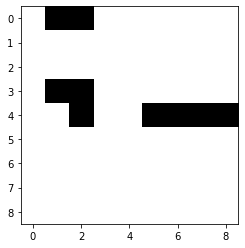

time: 91 ms (started: 2022-07-24 10:01:01 -07:00)


In [77]:
plt.imshow(g.get_adj_matrix().todense(), "Greys")

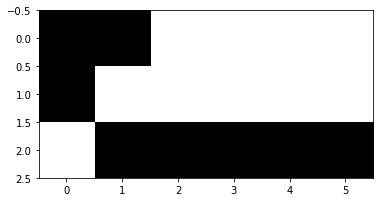

time: 85.1 ms (started: 2022-07-24 09:50:42 -07:00)


In [54]:
plt.imshow(g.get_interaction_matrix().todense(), "Greys")

In [86]:
g.get_negative_edges()

(['b1',
  'b1',
  'b1',
  'b1',
  'b1',
  'b1',
  'b1',
  'a1',
  'a1',
  'a1',
  'a1',
  'a1',
  'a1',
  'a1',
  'a1',
  'a1',
  'a2',
  'a2',
  'a2',
  'a2',
  'a2',
  'a2',
  'a2',
  'a2',
  'a2',
  'b2',
  'b2',
  'b2',
  'b2',
  'b2',
  'b2',
  'b2',
  'c1',
  'c1',
  'c1',
  'c1',
  'a3',
  'a3',
  'a3',
  'a3',
  'a3',
  'a3',
  'a3',
  'a3',
  'a3',
  'a4',
  'a4',
  'a4',
  'a4',
  'a4',
  'a4',
  'a4',
  'a4',
  'a4',
  'a5',
  'a5',
  'a5',
  'a5',
  'a5',
  'a5',
  'a5',
  'a5',
  'a5',
  'a6',
  'a6',
  'a6',
  'a6',
  'a6',
  'a6',
  'a6',
  'a6',
  'a6'],
 ['b1',
  'b2',
  'c1',
  'a3',
  'a4',
  'a5',
  'a6',
  'b1',
  'a1',
  'a2',
  'b2',
  'c1',
  'a3',
  'a4',
  'a5',
  'a6',
  'b1',
  'a1',
  'a2',
  'b2',
  'c1',
  'a3',
  'a4',
  'a5',
  'a6',
  'b1',
  'b2',
  'c1',
  'a3',
  'a4',
  'a5',
  'a6',
  'b1',
  'a1',
  'b2',
  'c1',
  'b1',
  'a1',
  'a2',
  'b2',
  'c1',
  'a3',
  'a4',
  'a5',
  'a6',
  'b1',
  'a1',
  'a2',
  'b2',
  'c1',
  'a3',
  'a4',
  'a5',

time: 3.71 ms (started: 2022-07-24 10:02:48 -07:00)


In [89]:
neg_sampler = RandomNegativeSampler(g, 15)
neg_sampler.sample()

(['b2',
  'a6',
  'a4',
  'a2',
  'a1',
  'a6',
  'a3',
  'a4',
  'c1',
  'c1',
  'a1',
  'c1',
  'a2',
  'a1',
  'b1'],
 ['a4',
  'b1',
  'a2',
  'b2',
  'a3',
  'b1',
  'a3',
  'b1',
  'a1',
  'c1',
  'a2',
  'c1',
  'a5',
  'a6',
  'b2'])

time: 3.41 ms (started: 2022-07-24 10:03:57 -07:00)


In [56]:
train_g, val_g, test_g = g.user_based_transductive_split((0.8, 0.1, 0.1))

got 10 negative edges
got 10 negative edges for splitting
time: 1.36 ms (started: 2022-07-24 09:50:44 -07:00)


In [57]:
train_g.get_edges_by_type()

defaultdict(list,
            {('c', 'a'): [('b2', 'a1'),
              ('c1', 'a5'),
              ('c1', 'a2'),
              ('c1', 'a4'),
              ('c1', 'a3')],
             ('b', 'a'): [('b1', 'a1')]})

time: 2.19 ms (started: 2022-07-24 09:50:45 -07:00)


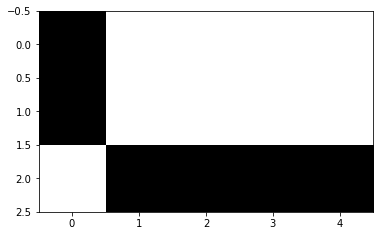

time: 84.6 ms (started: 2022-07-24 09:50:48 -07:00)


In [58]:
plt.imshow(train_g.get_interaction_matrix().todense(), "Greys")

## Create synthetic graph

generated bipartite graph


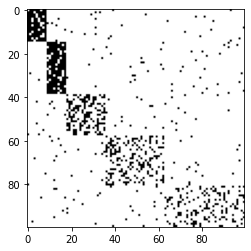

time: 132 ms (started: 2022-07-23 18:52:09 -07:00)


In [2]:
params = a
g, adj_matrix, interaction_matrix, data_path = generateSyntheticBipartiteGraph(params, save_graph = True)
print("generated bipartite graph")
plt.imshow(interaction_matrix.todense(), "Greys")
plt.show()


In [3]:
interaction_matrix = convert_adj_to_interaction(get_target_adj_matrix(data_path), data_path)

time: 7.81 ms (started: 2022-07-23 18:52:11 -07:00)


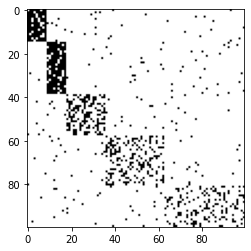

time: 91.2 ms (started: 2022-07-23 18:52:13 -07:00)


In [4]:
plt.imshow(interaction_matrix.todense(), "Greys")

2022-07-23 18:52:20.439 | INFO     | graph_modeling.training.train:training:74 - Directory synthetic_graphs/bipartite_graphs/n_vertices_A=100-n_vertices_B=100-exp_deg_B=10-exp_deg_B_range=1-n_clusters=5-cluster_slope=1-pq_ratio=0.8/1658627529449363000 has 1 graph files
2022-07-23 18:52:20.440 | INFO     | graph_modeling.training.train:training:76 - Selected graph 1658627529449363000adj
2022-07-23 18:52:20.440 | DEBUG    | graph_modeling.training.train:training:81 - Setting undirected=False since model_type=gumbel_box
2022-07-23 18:52:20.440 | WARNING  | pytorch_utils:cuda_if_available:31 - Requested CUDA but it is not available, running on CPU
2022-07-23 18:52:20.440 | INFO     | graph_modeling.training.dataset:edges_and_num_nodes_from_npz:105 - Loading synthetic_graphs/bipartite_graphs/n_vertices_A=100-n_vertices_B=100-exp_deg_B=10-exp_deg_B_range=1-n_clusters=5-cluster_slope=1-pq_ratio=0.8/1658627529449363000/1658627529449363000adj.npz...
2022-07-23 18:52:20.443 | INFO     | graph_mo

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch: 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]
                                                            
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, ?it/s]
                                                    
[Train] Batch:   0%|          | 0/1 [00:00<?, 

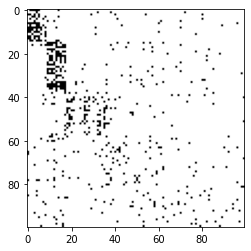

time: 1min 8s (started: 2022-07-23 18:52:16 -07:00)


In [5]:
reconstructed_by_box = box(data_path, box_type = "gumbel_box", config= {"epochs":1000})
plt.imshow(reconstructed_by_box.todense(), "Greys")
plt.show()

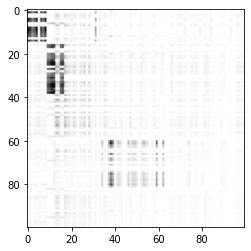

time: 551 ms (started: 2022-07-23 18:53:24 -07:00)


In [6]:
reconstructed_by_matrix_factorization = matrix_factorization(data_path)
plt.imshow(reconstructed_by_matrix_factorization.todense(), "Greys")
plt.show()